# Bio Neuro Project

In [8]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
import neurodynex3.tools.input_factory as input_factory
from Helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ex 1
## 1.1

We will simulate our neuron with no current to find the stable values of our parameters once the neuron has reached a stable state.

WARNING    C:\EPFL\master\MA_2\BioNeuro\BIO-465-project\Helpers.py:226: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axs[i].axis((
 [py.warnings]


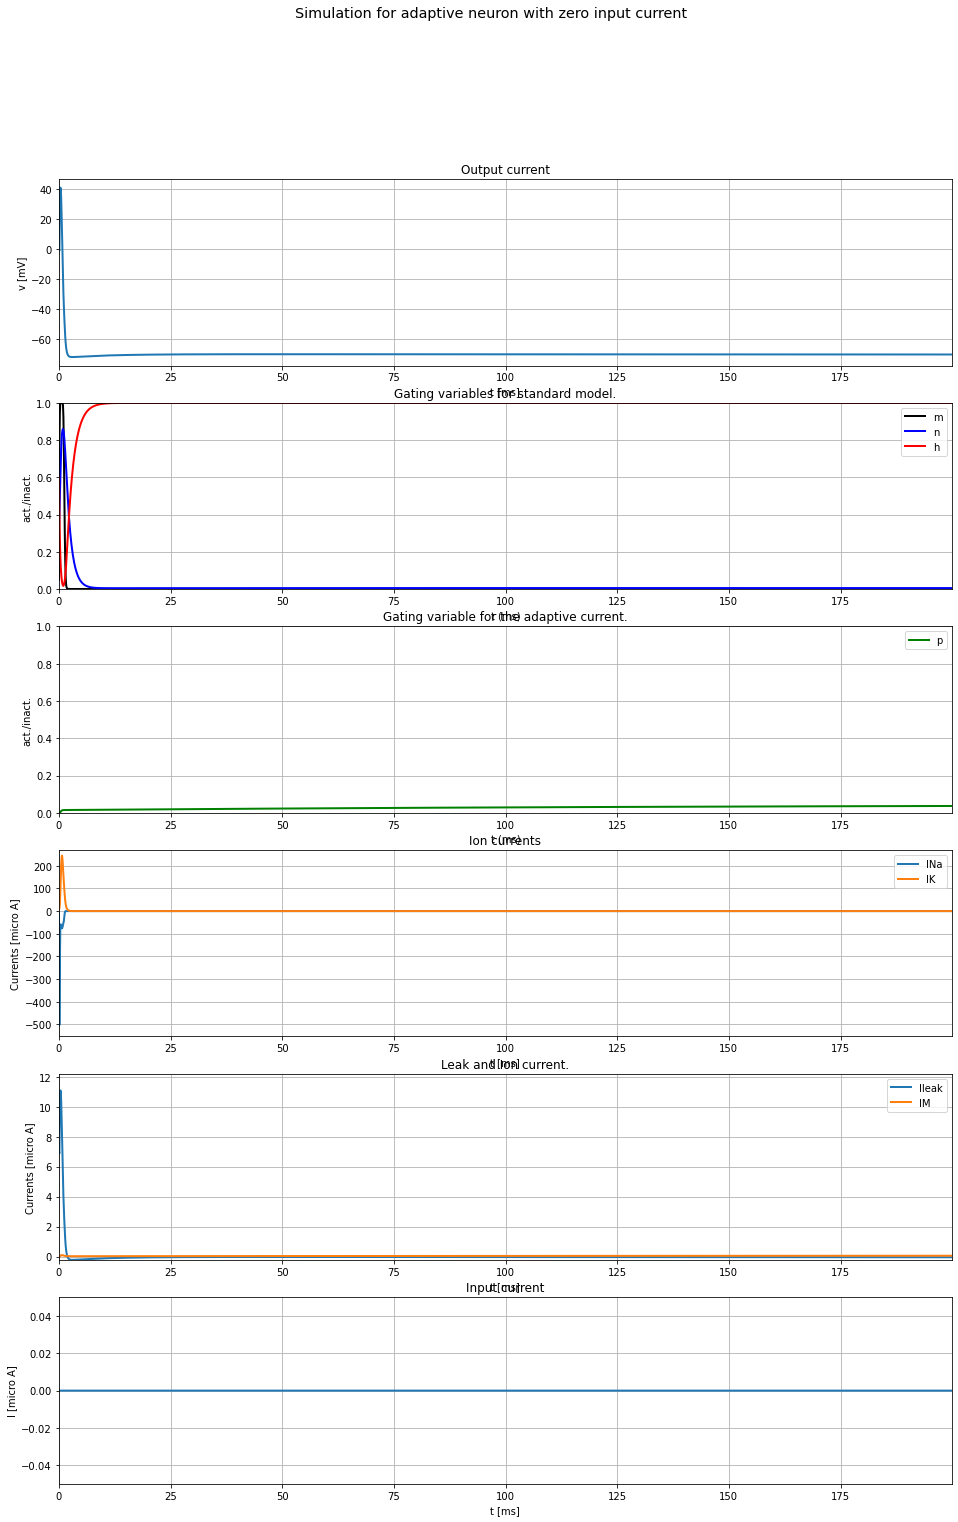

In [26]:
input_current = input_factory.get_zero_current()
state_monitor_stable = simulate_adaptive_HH_neuron(input_current, 200 * b2.ms)
plot_data(state_monitor_init_adaptive,"Simulation for adaptive neuron with zero input current")

We can now setup the values from the stable state for the following parameters:
- Resting potential $V_m$
- Gating variables $m,h,n,p$

In [45]:
regular_init = dict.fromkeys(["vm","m","h","n"])
adaptive_init = dict.fromkeys(["vm","m","h","n","p"])
for param, value in state_monitor_stable.get_states().items():
    if param in regular_init:
        regular_init[param] = value[-1][0]
    if param in adaptive_init:
        adaptive_init[param] = value[-1][0]

In [46]:
regular_init

{'vm': -70.49545635 * mvolt,
 'm': 0.0014972732909826762,
 'h': 0.9997210766416968,
 'n': 0.005966856281208903}

## 1.2

We will show that our regular spiking neuron model do not produce rebound spikes. For this we will use the same protocol as in the ex5, but show that no rebound occurs.

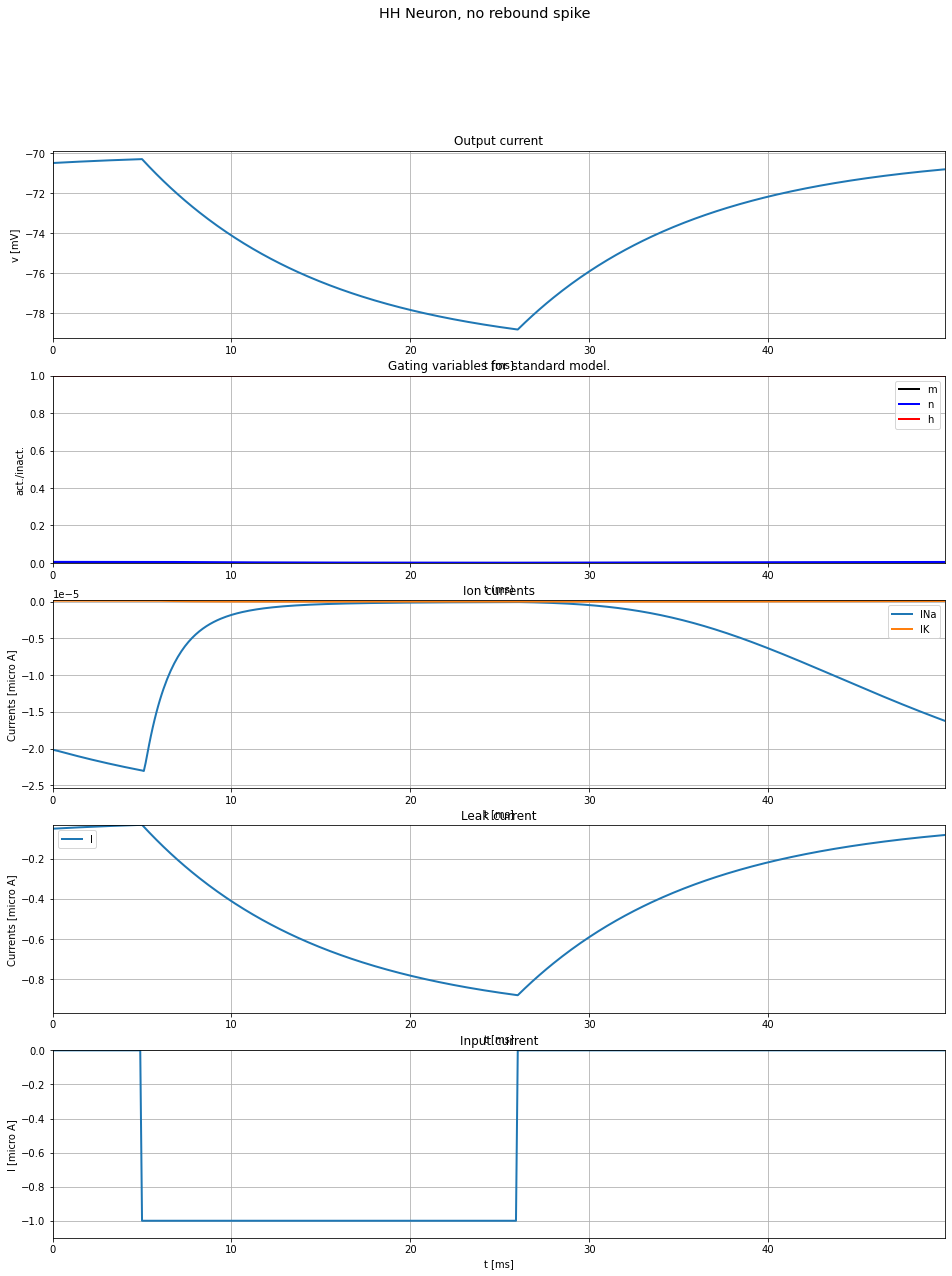

In [51]:
current = input_factory.get_step_current(5, 25, b2.ms, -1.*b2.uA)
state_monitor = simulate_regular_spiking_HH_neuron(current, 50 * b2.ms, init_dict= regular_init)
plot_data(state_monitor, title="HH Neuron, no rebound spike")